In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.DataFrame(pd.read_csv("/content/Fish.csv"))

In [ ]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
data.shape

(159, 7)

In [ ]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
from sklearn import preprocessing

encoder=preprocessing.LabelEncoder()
encoder.fit(data['Species'])
data['Species']=list(encoder.transform(data['Species']))

In [ ]:
data.head(-10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
144,3,1650.0,59.0,63.4,68.0,10.8120,7.4800
145,5,6.7,9.3,9.8,10.8,1.7388,1.0476
146,5,7.5,10.0,10.5,11.6,1.9720,1.1600
147,5,7.0,10.1,10.6,11.6,1.7284,1.1484


In [ ]:
data['Species'].value_counts().sort_index()

0    35
1    11
2    56
3    17
4    20
5    14
6     6
Name: Species, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f898937a6d0>,
      dtype=object)

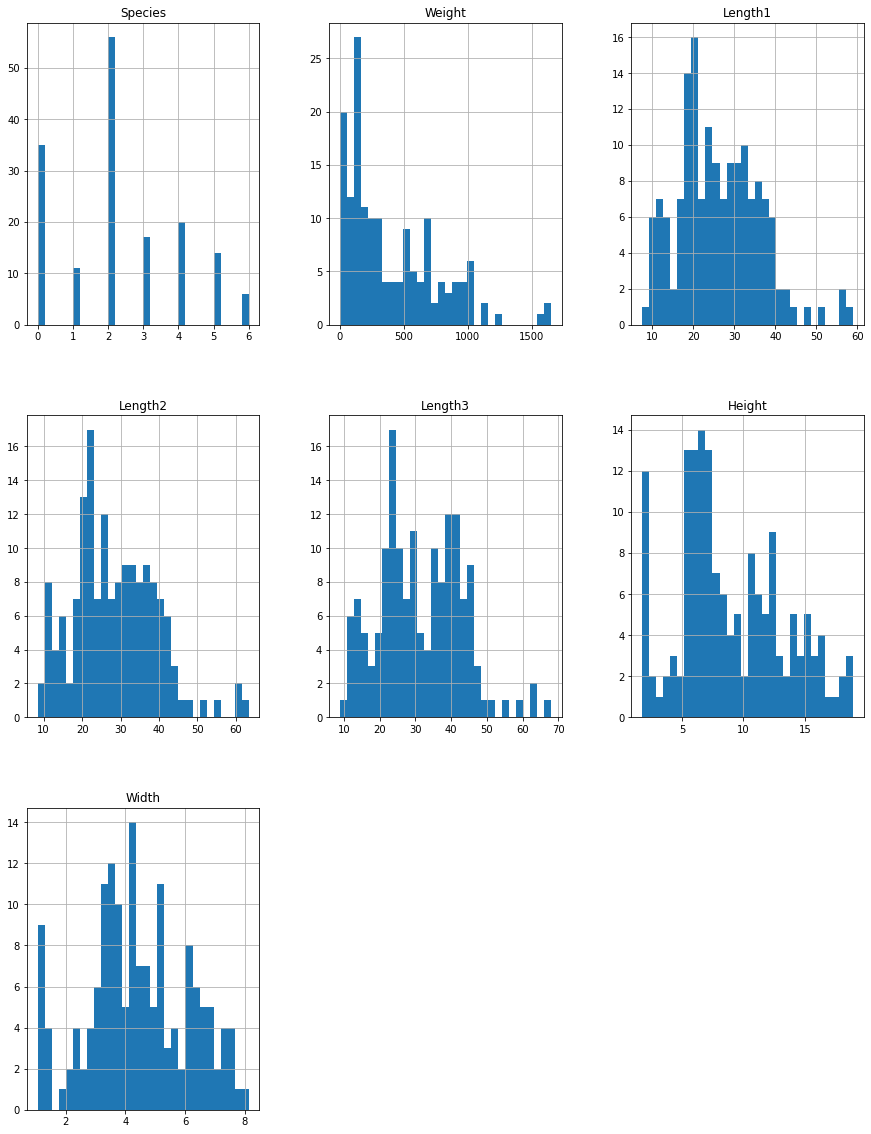

In [ ]:
data.hist(bins=30,figsize=[15,20])

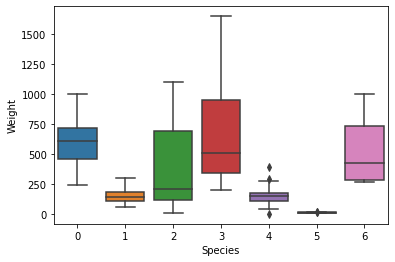

In [ ]:
sns.boxplot(y="Weight", x="Species", data=data)

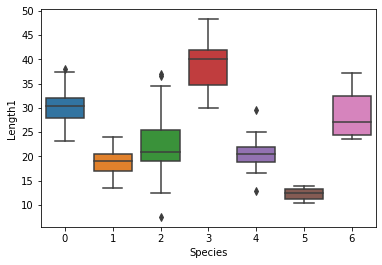

In [ ]:

sns.boxplot(y="Length1", x="Species", data=data)


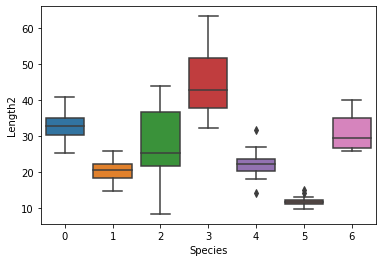

In [ ]:
sns.boxplot(y="Length2", x="Species", data=data)

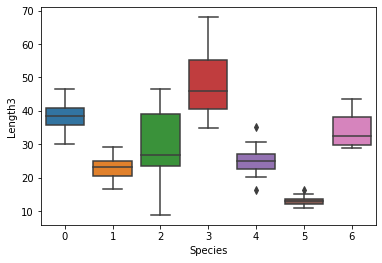

In [ ]:
sns.boxplot(y="Length3", x="Species", data=data)

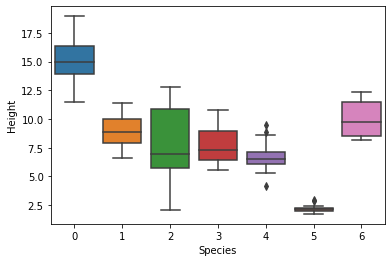

In [ ]:
sns.boxplot(y="Height", x="Species", data=data)

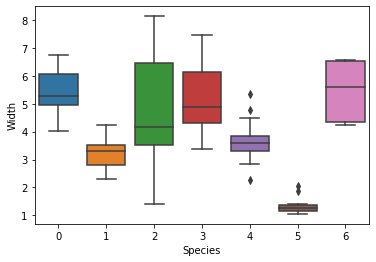

In [ ]:
sns.boxplot(y="Width", x="Species", data=data)

In [ ]:
def remove_outlier_IQR(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    df_final=series[~((series<(Q1-1.5*IQR)) | (series>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
col_name=(data.columns.values)
print(col_name)
for i in range (0,len(col_name)):
  df_outlier_removed=remove_outlier_IQR(data[col_name[i]])
  df_outlier_removed=pd.DataFrame(df_outlier_removed)
  ind_diff=data.index.difference(df_outlier_removed.index)
  print(ind_diff)
  for x in range(0, len(ind_diff),1):
    df_final=data.drop([ind_diff[x]])
    print(ind_diff)
    data=df_final
 


['Species' 'Weight' 'Length1' 'Length2' 'Length3' 'Height' 'Width']
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


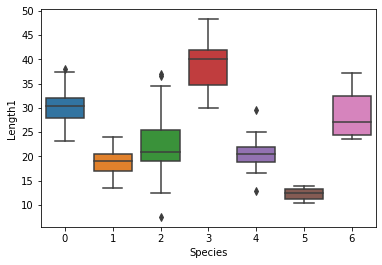

In [ ]:
sns.boxplot(y="Length1", x="Species", data=data)

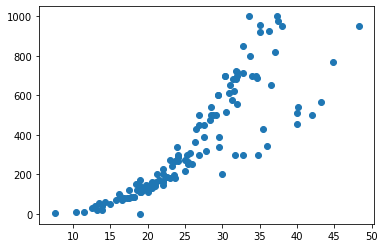

In [ ]:
plt.scatter(x='Length1',y='Weight',data=data)

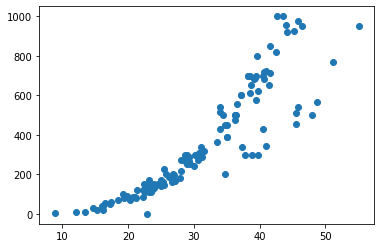

In [ ]:
plt.scatter(x='Length3',y='Weight',data=data)

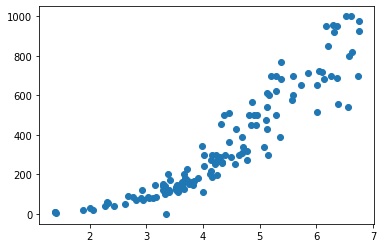

In [ ]:
plt.scatter(x='Width',y='Weight',data=data)

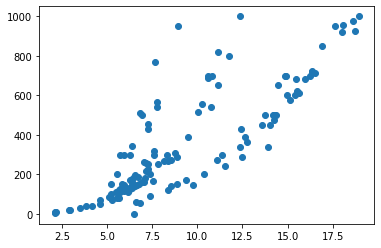

In [ ]:
plt.scatter(x='Height',y='Weight',data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  133 non-null    int64  
 1   Weight   133 non-null    float64
 2   Length1  133 non-null    float64
 3   Length2  133 non-null    float64
 4   Length3  133 non-null    float64
 5   Height   133 non-null    float64
 6   Width    133 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 12.4 KB


In [ ]:
data.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,2.060150,345.706015,25.495489,27.663910,30.598496,9.176954,4.323217
std,1.686665,270.961361,7.894272,8.431474,9.429178,4.173304,1.277996
min,0.000000,0.000000,7.500000,8.400000,8.800000,2.090400,1.380000
25%,0.000000,130.000000,19.800000,21.500000,23.500000,6.114600,3.525000
50%,2.000000,270.000000,24.100000,26.500000,29.000000,7.585200,4.234000
75%,3.000000,540.000000,31.400000,34.000000,38.600000,12.377800,5.170800
max,6.000000,1000.000000,48.300000,51.700000,55.100000,18.957000,6.749700


In [ ]:
corr_matrix=data.corr()

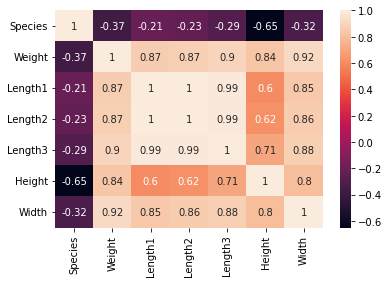

In [ ]:
sns.heatmap(corr_matrix,annot=True)

In [ ]:
corr_matrix['Weight'].sort_values( ascending=False)

Weight     1.000000
Width      0.921419
Length3    0.901495
Length2    0.874497
Length1    0.865046
Height     0.835638
Species   -0.373601
Name: Weight, dtype: float64

In [ ]:
X=data.drop('Weight',axis=1)
y=data['Weight']


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
x_train.shape

(106, 6)

In [ ]:
y_train.shape

(27, 6)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred_train_lr= model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

predicted_value= model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,predicted_value))) 
print(r2_score(y_test, predicted_value))

74.77126048304778
0.9244685571536431
74.14568965395394
0.9188541723642695


Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

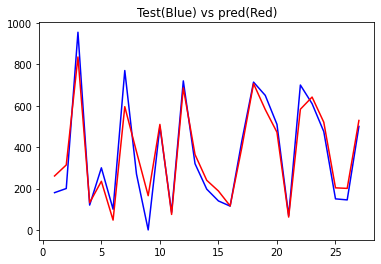

In [ ]:
c = [i for i in range(1,28,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, predicted_value,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

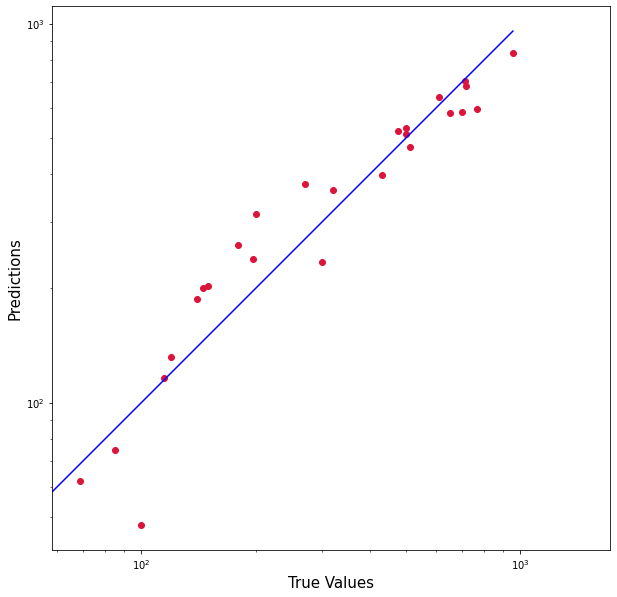

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(y_test))
p2 = min(min(predicted_value), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()